In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.DataFrame(columns=['calory', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])
df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

In [36]:
X=df[['calory','breakfast','lunch','dinner','exercise']]
Y=df[['body_shape']]

In [49]:
X

,calory,breakfast,lunch,dinner,exercise
0,1200,1,0,0,2
1,2800,1,1,1,1
2,3500,2,2,1,0
3,1400,0,1,0,3
4,5000,2,2,2,0
5,1300,0,0,1,2
6,3000,1,0,1,1
7,4000,2,2,2,0
8,2600,0,2,0,0
9,3000,1,2,1,1


In [37]:
from sklearn.preprocessing import StandardScaler

In [40]:
x_std=StandardScaler().fit_transform(X)

In [45]:
print(x_std)

[[-1.35205803  0.         -1.3764944  -1.28571429  1.        ]
 [ 0.01711466  0.         -0.22941573  0.14285714  0.        ]
 [ 0.61612771  1.29099445  0.91766294  0.14285714 -1.        ]
 [-1.18091145 -1.29099445 -0.22941573 -1.28571429  2.        ]
 [ 1.89972711  1.29099445  0.91766294  1.57142857 -1.        ]
 [-1.26648474 -1.29099445 -1.3764944   0.14285714  1.        ]
 [ 0.18826125  0.         -1.3764944   0.14285714  0.        ]
 [ 1.04399418  1.29099445  0.91766294  1.57142857 -1.        ]
 [-0.15403193 -1.29099445  0.91766294 -1.28571429 -1.        ]
 [ 0.18826125  0.          0.91766294  0.14285714  0.        ]]


In [41]:
#공분산 행렬
f=x_std.T
cov_matrix=np.cov(f)
print(cov_matrix)
#'calory', 'breakfast', 'lunch', 'dinner', 'exercise'

[[ 1.11111111  0.88379717  0.76782385  0.89376551 -0.93179808]
 [ 0.88379717  1.11111111  0.49362406  0.81967902 -0.71721914]
 [ 0.76782385  0.49362406  1.11111111  0.40056715 -0.76471911]
 [ 0.89376551  0.81967902  0.40056715  1.11111111 -0.63492063]
 [-0.93179808 -0.71721914 -0.76471911 -0.63492063  1.11111111]]


In [42]:
eig_vals, eig_vecs=np.linalg.eig(cov_matrix)

print("고유벡터 \n %s" % eig_vecs)
print("고유값 \n %s" % eig_vals)

고유벡터 
 [[ 0.508005    0.0169937  -0.84711404  0.11637853  0.10244985]
 [ 0.44660335  0.36890361  0.12808055 -0.63112016 -0.49973822]
 [ 0.38377913 -0.70804084  0.20681005 -0.40305226  0.38232213]
 [ 0.42845209  0.53194699  0.3694462   0.22228235  0.58954327]
 [-0.46002038  0.2816592  -0.29450345 -0.61341895  0.49601841]]
고유값 
 [4.0657343  0.8387565  0.07629538 0.27758568 0.2971837 ]


In [43]:
eig_vals[0]/sum(eig_vals) #73% 데이터의 특성을 담는다
#5차원 -> 1차원(eig_vals[0])축으로 차원축소하면 73% 
#데이터의 특성을 살린다

0.7318321731427544

In [44]:
#첫번째 고유벡터에 데이터를 정사영
projected_x=x_std.dot(eig_vecs.T[0])
projected_x

array([-2.22600943, -0.0181432 ,  1.76296611, -2.73542407,  3.02711544,
       -2.14702579, -0.37142473,  2.59239883, -0.39347815,  0.50902498])

In [46]:
x_std.shape  #10행 5열
eig_vecs.T[0].shape  #5행 1열
#10행 1열

(5,)

In [47]:
res=pd.DataFrame(projected_x, columns=['PC1'])
res
res['yaxis']=0.0
res['label']=Y
res

,PC1,yaxis,label
0,-2.226009,0.0,Skinny
1,-0.018143,0.0,Normal
2,1.762966,0.0,Fat
3,-2.735424,0.0,Skinny
4,3.027115,0.0,Fat
5,-2.147026,0.0,Skinny
6,-0.371425,0.0,Normal
7,2.592399,0.0,Fat
8,-0.393478,0.0,Normal
9,0.509025,0.0,Fat


Text(0.5, 1.0, 'PCA result')

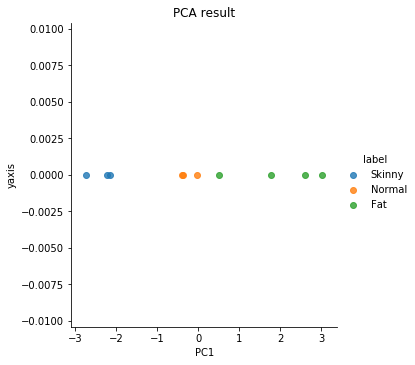

In [48]:
sns.lmplot('PC1', 'yaxis', data=res, hue='label',fit_reg=False)
plt.title('PCA result')

## Quiz / Practice 

### 1. userID가 1인 사람에게 추천 하고자 하는 영화와 그 영화에 줄 예상평점 ?
-KNN or Piearson 이용

In [142]:
ratings=pd.read_csv("C:/Users/student/Downloads/movielens/ratings.csv")
movies=pd.read_csv("C:/Users/student/Downloads/movielens/movies.csv")

In [143]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [145]:
ratings.shape

(1048575, 4)

In [146]:
movies.shape

(27278, 3)

In [147]:
#아이디별 본 영화 갯수
ratings.groupby("userId").size()

userId
1       175
2        61
3       187
4        28
5        66
       ... 
7116    232
7117    188
7118     40
7119     50
7120     20
Length: 7120, dtype: int64

In [148]:
ratings=ratings.iloc[:,:3]

In [149]:
movie_r=pd.merge(ratings, movies, how="left")

In [150]:
movie_r 

,userId,movieId,rating,title,genres
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy
1,1,29,3.5,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
2,1,32,3.5,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,3.5,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,3.5,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...
1048570,7120,168,5.0,First Knight (1995),Action|Drama|Romance
1048571,7120,253,4.0,Interview with the Vampire: The Vampire Chroni...,Drama|Horror
1048572,7120,260,5.0,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
1048573,7120,261,4.0,Little Women (1994),Drama


In [151]:
movie_r["title"].value_counts()

Pulp Fiction (1994)                                   3498
Forrest Gump (1994)                                   3476
Silence of the Lambs, The (1991)                      3247
Shawshank Redemption, The (1994)                      3216
Jurassic Park (1993)                                  3129
                                                      ... 
Pirate, The (1948)                                       1
Honeysuckle Rose (a.k.a. On the Road Again) (1980)       1
Evidence (2013)                                          1
Forbidden Christ, The (Cristo proibito, Il) (1950)       1
Trailer Park Boys (1999)                                 1
Name: title, Length: 14021, dtype: int64

In [154]:
movie_r

,userId,movieId,rating,title,genres
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy
1,1,29,3.5,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
2,1,32,3.5,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,3.5,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,3.5,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...
1048570,7120,168,5.0,First Knight (1995),Action|Drama|Romance
1048571,7120,253,4.0,Interview with the Vampire: The Vampire Chroni...,Drama|Horror
1048572,7120,260,5.0,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
1048573,7120,261,4.0,Little Women (1994),Drama


In [157]:
# pd.pivot_table(data=rating, index=userId, columns=movieId)

### 2. iris데이터셋 4차원 -> 2차원으로 차원축소 (PCA)  -> 시각화 

In [10]:
from sklearn import datasets

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
iris=datasets.load_iris()

In [25]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [28]:
df_X=pd.DataFrame(iris.data)
df_y=pd.DataFrame(iris.target)

In [51]:
feature_names=iris.feature_names

In [52]:
df_X.columns=feature_names

In [53]:
df_X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [54]:
x_std=StandardScaler().fit_transform(df_X)

#공분산 행렬
f=x_std.T
cov_matrix=np.cov(f)
print(cov_matrix)

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [55]:
eig_vals, eig_vecs=np.linalg.eig(cov_matrix)

print("고유벡터 \n %s" % eig_vecs)
print("고유값 \n %s" % eig_vals)

고유벡터 
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]
고유값 
 [2.93808505 0.9201649  0.14774182 0.02085386]


In [75]:
#4차원->2차원으로 차원축소했을때 95.8%의 특성을 가짐.
(eig_vals[0]+eig_vals[1])/sum(eig_vals)

0.9581320720000164

In [81]:
#첫번째 고유벡터에 데이터를 정사영
projected_x1=x_std.dot(eig_vecs.T[0])
projected_x1

array([-2.26470281, -2.08096115, -2.36422905, -2.29938422, -2.38984217,
       -2.07563095, -2.44402884, -2.23284716, -2.33464048, -2.18432817,
       -2.1663101 , -2.32613087, -2.2184509 , -2.6331007 , -2.1987406 ,
       -2.26221453, -2.2075877 , -2.19034951, -1.898572  , -2.34336905,
       -1.914323  , -2.20701284, -2.7743447 , -1.81866953, -2.22716331,
       -1.95184633, -2.05115137, -2.16857717, -2.13956345, -2.26526149,
       -2.14012214, -1.83159477, -2.61494794, -2.44617739, -2.10997488,
       -2.2078089 , -2.04514621, -2.52733191, -2.42963258, -2.16971071,
       -2.28647514, -1.85812246, -2.5536384 , -1.96444768, -2.13705901,
       -2.0697443 , -2.38473317, -2.39437631, -2.22944655, -2.20383344,
        1.10178118,  0.73133743,  1.24097932,  0.40748306,  1.0754747 ,
        0.38868734,  0.74652974, -0.48732274,  0.92790164,  0.01142619,
       -0.11019628,  0.44069345,  0.56210831,  0.71956189, -0.0333547 ,
        0.87540719,  0.35025167,  0.15881005,  1.22509363,  0.16

In [82]:
#첫번째 고유벡터에 데이터를 정사영
projected_x2=x_std.dot(eig_vecs.T[1])
projected_x2

array([-0.4800266 ,  0.67413356,  0.34190802,  0.59739451, -0.64683538,
       -1.48917752, -0.0476442 , -0.22314807,  1.11532768,  0.46901356,
       -1.04369065, -0.13307834,  0.72867617,  0.96150673, -1.86005711,
       -2.68628449, -1.48360936, -0.48883832, -1.40501879, -1.12784938,
       -0.40885571, -0.92412143, -0.45834367, -0.08555853, -0.13725446,
        0.62561859, -0.24216355, -0.52714953, -0.31321781,  0.3377319 ,
        0.50454069, -0.42369507, -1.79357586, -2.15072788,  0.46020184,
        0.2061074 , -0.66155811, -0.59229277,  0.90418004, -0.26887896,
       -0.44171539,  2.33741516,  0.47910069, -0.47232667, -1.14222926,
        0.71105273, -1.1204297 ,  0.38624687, -0.99795976, -0.00921636,
       -0.86297242, -0.59461473, -0.61629765,  1.75440399,  0.20842105,
        0.59328364, -0.77301931,  1.85242909, -0.03222608,  1.03401828,
        2.65407282,  0.06329519,  1.76472438,  0.18622461,  0.43900321,
       -0.50906396,  0.19631173,  0.79209574,  1.6222438 ,  1.30

In [90]:
res1=pd.DataFrame(projected_x1, columns=['PC1'])
res1['yaxis']=0.0
res1['label']=df_y
res1

,PC1,yaxis,label
0,-2.264703,0.0,0
1,-2.080961,0.0,0
2,-2.364229,0.0,0
3,-2.299384,0.0,0
4,-2.389842,0.0,0
...,...,...,...
145,1.870503,0.0,2
146,1.564580,0.0,2
147,1.521170,0.0,2
148,1.372788,0.0,2


In [91]:
res2=pd.DataFrame(projected_x2, columns=['PC2'])
res2['yaxis']=0.0
res2['label']=df_y
res2

,PC2,yaxis,label
0,-0.480027,0.0,0
1,0.674134,0.0,0
2,0.341908,0.0,0
3,0.597395,0.0,0
4,-0.646835,0.0,0
...,...,...,...
145,-0.386966,0.0,2
146,0.896687,0.0,2
147,-0.269069,0.0,2
148,-1.011254,0.0,2


In [101]:
two_pc=pd.concat([res1.PC1,res2.PC2,res1.label],axis=1)

Text(0.5, 1.0, 'PCA result')

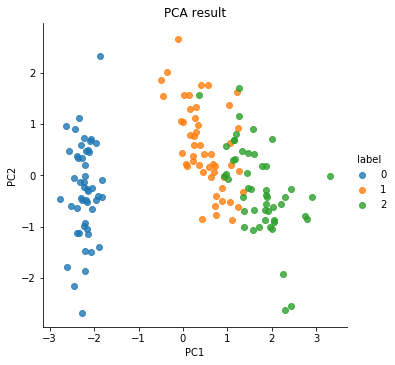

In [103]:
sns.lmplot('PC1', 'PC2', data=two_pc, hue="label", fit_reg=False)

plt.title('PCA result')